# Diagrama de Persistencia

Sea $K$ un complejo simplicial y $f: K \longrightarrow \mathbb{R}$ monótona, no decreciente al considerear cadenas crecientes de caras del complejo simplicial, es decir:
$$f(\sigma)\leq f(\tau)$$
si $\sigma$ es cara de $\tau$.

Los conjuntos de nivel $K(a)=f^{-1}\left(-\infty,a\right]$ son subcomplehos de $K$ para todo $a\in\mathbb{R}$.

Consideremos $a_0=-\infty$ y $a_1<a_2<\cdots <a_n$ son los valores de la función de los simplices en $K$ y denotemos por $K_i = K(a_i)$. Entonces la colección:

$$\emptyset = K_0 \subseteq K_1 \subseteq \cdots \subseteq K_n = K$$

es a lo que llamamos una _filtración_.

Para cada $i\leq j$ tenemos una inclusión de $K_i$ a $K_j$ y por lo tanto un morfismo inducido:

$$f_{p}^{i,j}: H_{p}(K_i)\longrightarrow H_{p}(K_j)$$

para cada $p$.

Entonces, la filtración corresponde a una sucesión de grupos de homología con sus homomorfismos:

$$0= H_{p}(K_0)\longrightarrow H_{p}(K_1)\longrightarrow \cdots \longrightarrow H_{p}(K_n) = H_{p}(K)$$

para cada dimensión $p$.

__Def.__ El _p-ésimo grupo de homología persistente_ es la imagen del homomorfismo inducido por la inclusión 
$$H_{p}^{i,j}=\text{im} f_{p}^{i,j}$$

para $0\leq i\leq j\leq n$. Los correspondientes _p-ésimos números de Betti persistentes_ son las dimensiones $\beta_{p}^{i,j}=\text{dime}H_{p} ^{i,j}$ de los espacios vectoriales $H_{p}^{i,j}$.

Si $\gamma$ es una clase en $H_{p}(K_i)$ decimos que _nace_ en $K_i$ si $\gamma \notin H_{p}^{i-1,i}$. Además, si $\gamma$ nace en $K_i$, entonces decimos que _muere_ al entrar a $K_j$ si se conecta a una clase más vieja conforme viajamos de $K_{j-1}$ a $K_j$, es decir si 

$$f_{p}^{i,j-1}(\gamma)\notin H_{p}^{i-1,j-1}$$ 

pero 

$$f_{p}^{i,j}(\gamma)\notin H_{p}^{i-1,j}.$$ 

Si $\gamma$ _nace_ en $K_i$ y _muere_ al entrar a $K_j$, entonce a la diferencia entre los valores de la función le llamaremos la _persistencia_ de la clase $\gamma$, $\text{pers}(\gamma)=a_{j}-a_i$.

Si $\gamma$ _nace_ en $K_i$ y nunca muere entonces hacemos su persistencia igual a $\infty$.

La colección de números de Betti persistentes se representa por puntos en un espacio de 2-dimensiones. Algunos pueden tener una coordenada igual a infinito y otros pueden ser los mismos. Entonces pensamos en ellos como un multiconjunto de puntos en $\bar{\mathbb{R}}^{2}= (\mathbb{R}\cup {\pm \infty} )^{2}$ .

Sea $\mu_{p}^{i,j}$ el número de clases de $p-$dim independientes que _nacen_ en $K_i$ y _mueren_ entrando a $K-j$:

$$\mu_{p}^{i,j} = (\beta_{p}^{i,j-1}- \beta_{p}^{i,j}) - (\beta_{p}^{i-1,j-1} - \beta_{p}^{i-1,j})$$

para todo $i<j$ y para todo $p$.

 - $\beta_{p}^{i,j-1}- \beta_{p}^{i,j}:$ Cuenta las clases que _nacen_ en o antes de $K_i$ y que mueren al entrar a $K_j$.
 
 - $\beta_{p}^{i-1,j-1} - \beta_{p}^{i-1,j}:$ Cuenta las clases que _nacen_ en o antes de $K_{i-1}$ y que mueren al entrar a $K_j$.
 
 
 Al dibujar cada punto $(a_i,a_j)$ con sus multiplicidades $\mu_{p}^{i,j}$ obtenemos el _p-ésimo diagrama de persistencia_ de la filtración y lo denotamos por $Dgm_{p}(f)$.
 
 $\beta_{p}^{k,l}$ es el número de puntos en $Dgm_{p}(f)$ en el cuadrante superior izquierdo con esquina $(a_k,a_l)$. Una clase que nace en $K_i$ y muere al entrar a $K_j$ se cuenta si y sólo si $a_i < a_k$ y $a_j > a_l$.
 
 
 __LEMA FUNDAMENTAL DE LA HOMOLOGÍA PERSISTENTE.__ Sea $\emptyset = K_0 \subseteq K_1 \subseteq \cdots \subseteq K_n = K$ una filtración. Para cada par de índices $0\leq k\leq l \leq n$ y cada dimensión $p$, el p-ésimo número de Betti es 
 
 $$\beta_{p}^{k,l} = \sum_{i\leq k} \sum_{j>l} \mu_{p}^{i,j} $$


![clases](https://github.com/HaydeePeruyero/CursoA_Aplicaciones_TDA/blob/main/practicas/DiagPersistencia/persitencia.jpg)

## Ejemplo. 

La primera parte del ejemplo será en R y la segunda en Python.

In [ ]:
# R
# Instalar las librerias ripserr y ggtda
# https://github.com/tdaverse/tdaverse

library(ripserr)
library(ggtda)



In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance

In [55]:
url = "https://raw.githubusercontent.com/HaydeePeruyero/CursoA_Aplicaciones_TDA/main/practicas/DiagPersistencia/datos.csv"
df = pd.read_csv(url, header=0)

In [56]:
df

,x,y
0,1.000000,0.000000
1,0.707107,0.707107
2,0.000000,1.000000
3,-0.707107,0.707107
4,-1.000000,0.000000
...,...,...
69,31.975377,3.920416
70,33.757390,4.828397
71,35.171603,6.242610
72,36.079584,8.024623


In [6]:
# Accede a las coordenadas y conviértelas a un array NumPy
coordinates = df[['x', 'y']].values

# Calcula la matriz de distancias euclidianas
distances = distance.cdist(coordinates, coordinates, 'euclidean')

# Convierte la matriz de distancias a un DataFrame
df_distances = pd.DataFrame(distances, index=df.index, columns=df.index)

In [7]:
df_distances

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,0.000000,0.765367,1.414214,1.847759,2.000000,1.847759,1.414214,0.765367,4.000000,3.773942,...,24.284564,24.632553,25.700249,27.307507,29.223525,31.222486,33.111327,34.737137,35.985717,36.778061
1,0.765367,0.000000,0.765367,1.414214,1.847759,2.000000,1.847759,1.414214,4.350739,4.000000,...,24.339346,24.748301,25.865942,27.505855,29.436137,31.432945,33.306249,34.906207,36.121437,36.875491
2,1.414214,0.765367,0.000000,0.765367,1.414214,1.847759,2.000000,1.847759,5.099020,4.716210,...,24.930536,25.375860,26.520392,28.176379,30.113108,32.108465,33.973784,35.560183,36.757064,37.488807
3,1.847759,1.414214,0.765367,0.000000,0.765367,1.414214,1.847759,2.000000,5.750745,5.414214,...,25.691651,26.128600,27.263020,28.910857,30.843783,32.840068,34.710035,36.303218,37.507422,38.245722
4,2.000000,1.847759,1.414214,0.765367,0.000000,0.765367,1.414214,1.847759,6.000000,5.750745,...,26.180560,26.572096,27.667187,29.288196,31.209204,33.207606,35.091161,36.706336,37.937978,38.706531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,31.222486,31.432945,32.108465,32.840068,33.207606,33.008464,32.351742,31.608838,27.258771,27.456946,...,9.040294,7.514779,5.804226,3.950753,2.000000,0.000000,2.000000,3.950753,5.804226,7.514779
70,33.111327,33.306249,33.973784,34.710035,35.091161,34.906207,34.256847,33.510640,29.159919,29.341165,...,10.343207,9.040294,7.514779,5.804226,3.950753,2.000000,0.000000,2.000000,3.950753,5.804226
71,34.737137,34.906207,35.560183,36.303218,36.706336,36.545593,35.909568,35.158215,30.810645,30.963323,...,11.391435,10.343207,9.040294,7.514779,5.804226,3.950753,2.000000,0.000000,2.000000,3.950753
72,35.985717,36.121437,36.757064,37.507422,37.937978,37.808779,37.191131,36.434260,32.098834,32.214568,...,12.159169,11.391435,10.343207,9.040294,7.514779,5.804226,3.950753,2.000000,0.000000,2.000000


In [8]:
import pandas as pd
from matplotlib import cm
import numpy as np
import gudhi
import time
import os  

In [9]:
DistanceMatrix = df_distances.to_numpy()
DistanceMatrix

array([[ 0.        ,  0.76536686,  1.41421356, ..., 34.73713653,
        35.9857168 , 36.77806065],
       [ 0.76536686,  0.        ,  0.76536686, ..., 34.90620745,
        36.12143704, 36.87549071],
       [ 1.41421356,  0.76536686,  0.        , ..., 35.56018336,
        36.75706375, 37.48880702],
       ...,
       [34.73713653, 34.90620745, 35.56018336, ...,  0.        ,
         2.        ,  3.95075336],
       [35.9857168 , 36.12143704, 36.75706375, ...,  2.        ,
         0.        ,  2.        ],
       [36.77806065, 36.87549071, 37.48880702, ...,  3.95075336,
         2.        ,  0.        ]])

In [47]:
max_edge_length = 7
#0.2588190*2+0.05
# Rips complex with the distance matrix
start_time = time.time()
ripsComplex = gudhi.RipsComplex(
    distance_matrix = DistanceMatrix, 
    max_edge_length = max_edge_length
)
print("The Rips complex was created in %s" % (time.time() - start_time) )

The Rips complex was created in 0.0009996891021728516


In [48]:
start_time = time.time()
simplexTree = ripsComplex.create_simplex_tree(
    max_dimension = 3)
print("The filtration of the Rips complex was created in %s" % (time.time() - start_time))

The filtration of the Rips complex was created in 0.002356290817260742


In [49]:
start_time = time.time()
persistence = simplexTree.persistence()  
print("The persistente diagram of the Rips complex was created in %s" % (time.time() - start_time))

The persistente diagram of the Rips complex was created in 0.010270357131958008


In [50]:
result_str = 'Rips complex of dimension ' + repr(simplexTree.dimension())
print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplexTree.get_filtration():
    print(tuple(filtered_value))


Rips complex of dimension 3
([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([5], 0.0)
([6], 0.0)
([7], 0.0)
([8], 0.0)
([9], 0.0)
([10], 0.0)
([11], 0.0)
([12], 0.0)
([13], 0.0)
([14], 0.0)
([15], 0.0)
([16], 0.0)
([17], 0.0)
([18], 0.0)
([19], 0.0)
([20], 0.0)
([21], 0.0)
([22], 0.0)
([23], 0.0)
([24], 0.0)
([25], 0.0)
([26], 0.0)
([27], 0.0)
([28], 0.0)
([29], 0.0)
([30], 0.0)
([31], 0.0)
([32], 0.0)
([33], 0.0)
([34], 0.0)
([35], 0.0)
([36], 0.0)
([37], 0.0)
([38], 0.0)
([39], 0.0)
([40], 0.0)
([41], 0.0)
([42], 0.0)
([43], 0.0)
([44], 0.0)
([45], 0.0)
([46], 0.0)
([47], 0.0)
([48], 0.0)
([49], 0.0)
([50], 0.0)
([51], 0.0)
([52], 0.0)
([53], 0.0)
([54], 0.0)
([55], 0.0)
([56], 0.0)
([57], 0.0)
([58], 0.0)
([59], 0.0)
([60], 0.0)
([61], 0.0)
([62], 0.0)
([63], 0.0)
([64], 0.0)
([65], 0.0)
([66], 0.0)
([67], 0.0)
([68], 0.0)
([69], 0.0)
([70], 0.0)
([71], 0.0)
([72], 0.0)
([73], 0.0)
([32, 33], 0.5176380902050409)
([26, 27], 0.517638090205041)
([27, 28], 0.5176380902050413)
([

In [51]:
simplexTree.dimension(), simplexTree.num_vertices(), simplexTree.num_simplices()

(3, 74, 16478)

Bar code diagram was created in 0.4414241313934326


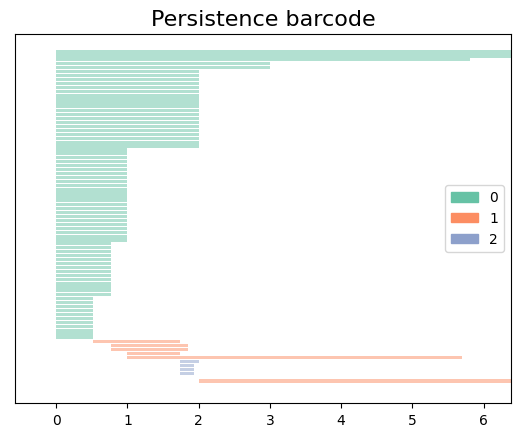

In [52]:
start_time = time.time()
gudhi.plot_persistence_barcode(
    persistence = persistence, 
    alpha = 0.5,
    colormap = cm.Set2.colors
)
print("Bar code diagram was created in %s" % (time.time() - start_time))

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

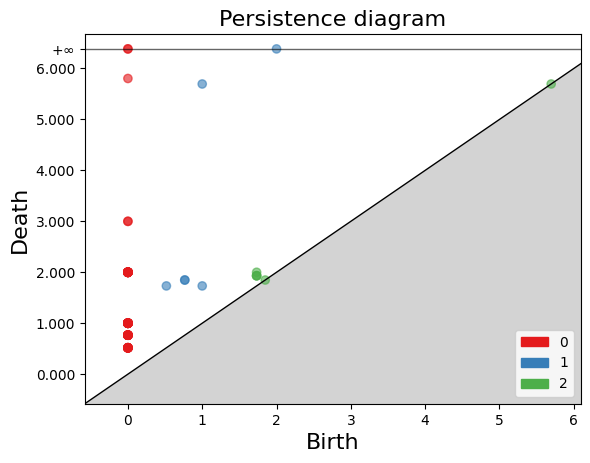

In [16]:
gudhi.plot_persistence_diagram(persistence, legend=True)